In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.fit(train_images, train_labels, epochs=5, batch_size=64)



Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 0.1728 - accuracy: 0.9456
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0456 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0315 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0232 - accuracy: 0.9932
Epoch 5/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0187 - accuracy: 0.9944


In [7]:
import os, shutil

original_dataset_dir = 'D:\\GitHub\\PTHT_TM\\training_set\\training_set'

base_dir = 'D:\\GitHub\\PTHT_TM\\base_dir'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,"cats\\"+fname)
    dst = os.path.join(train_cats_dir, fname)
    # print(original_dataset_dir,'cats'+fname)
    # print(src)
    shutil.copyfile(src, dst)
#
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,"cats\\"+fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
#
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,"cats\\"+fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
#
fnames = ['dog.{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "dogs\\" + fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "dogs\\" + fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "dogs\\" + fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)




In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential_1"


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 17, 17, 128)      

In [9]:
from keras import optimizers

model.compile(
    loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"]
)


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17448\1938628719.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 43s 419ms/step - loss: 0.7047 - acc: 0.4930 - val_loss: 0.6919 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 41s 408ms/step - loss: 0.7133 - acc: 0.5370 - val_loss: 0.6811 - val_acc: 0.5640
Epoch 3/30
100/100 [==============================] - 44s 435ms/step - loss: 0.6767 - acc: 0.6076 - val_loss: 0.6361 - val_acc: 0.6340
Epoch 4/30
100/100 [==============================] - 41s 405ms/step - loss: 0.6366 - acc: 0.6431 - val_loss: 0.6054 - val_acc: 0.6830
Epoch 5/30
100/100 [==============================] - 39s 394ms/step - loss: 0.5990 - acc: 0.6932 - val_loss: 0.5906 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 40s 396ms/step - loss: 0.5596 - acc: 0.7112 - val_loss: 0.5724 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 39s 393ms/step - loss: 0.5260 - acc: 0.7372 - val_loss: 0.5804 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 3

In [12]:
model.save('cats_and_dogs_small_1.h5')

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


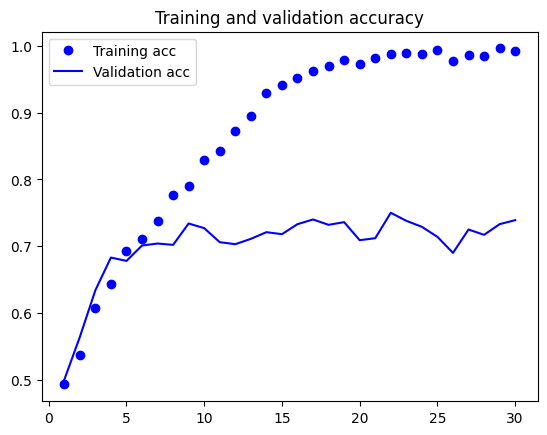

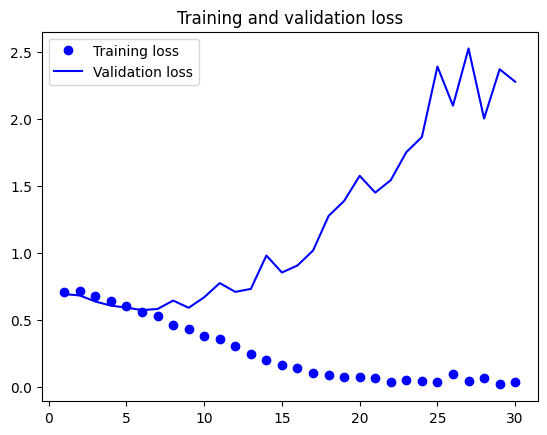

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


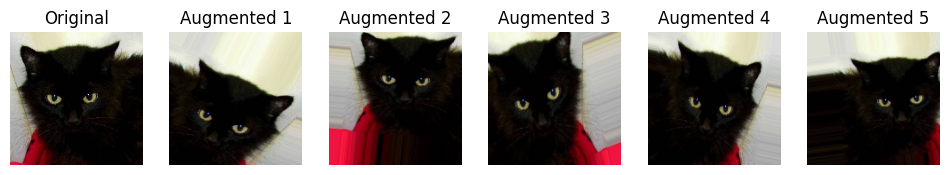

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
img_path = "D:\\GitHub\\PTHT_TM\\base_dir\\test\\cats\\cat.1500.jpg"  
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a numpy array
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
augmented_images = []
for batch in datagen.flow(x, batch_size=1):
    augmented_images.append(image.array_to_img(batch[0]))
    if len(augmented_images) >= 5:  # Generate and display 5 augmented images
        break

# Display the original and augmented images
plt.figure(figsize=(12, 6))
for i, img in enumerate([img] + augmented_images):
    plt.subplot(1, 6, i + 1)
    plt.imshow(img)
    plt.axis("off")
    if i == 0:
        plt.title("Original")
    else:
        plt.title(f"Augmented {i}")

plt.show()


In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"]
)



In [22]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode="binary"
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=63,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
)


Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17448\301376788.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


63/63 [==============================] - ETA: 0s - loss: 0.6988 - acc: 0.4950WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.


63/63 [==============================] - 36s 565ms/step - loss: 0.6988 - acc: 0.4950 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 2/100
63/63 [==============================] - 34s 533ms/step - loss: 0.6982 - acc: 0.5270
Epoch 3/100
63/63 [==============================] - 34s 536ms/step - loss: 0.6927 - acc: 0.5450
Epoch 4/100
63/63 [==============================] - 34s 538ms/step - loss: 0.6866 - acc: 0.5671
Epoch 5/100
63/63 [==============================] - 35s 554ms/step - loss: 0.6837 - acc: 0.5961
Epoch 6/100
63/63 [==============================] - 34s 543ms/step - loss: 0.6523 - acc: 0.5996
Epoch 7/100
63/63 [==============================] - 34s 536ms/step - loss: 0.6443 - acc: 0.6431
Epoch 8/100
63/63 [==============================] - 34s 542ms/step - loss: 0.6398 - acc: 0.6421
Epoch 9/100
63/63 [==============================] - 34s 534ms/step - loss: 0.6274 - acc: 0.6527
Epoch 10/100
63/63 [==============================] - 34s 537ms/step - loss: 0.6101 - acc: 0.6622
Epoc

In [23]:
model.save('cats_and_dogs_small_2.h5')

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


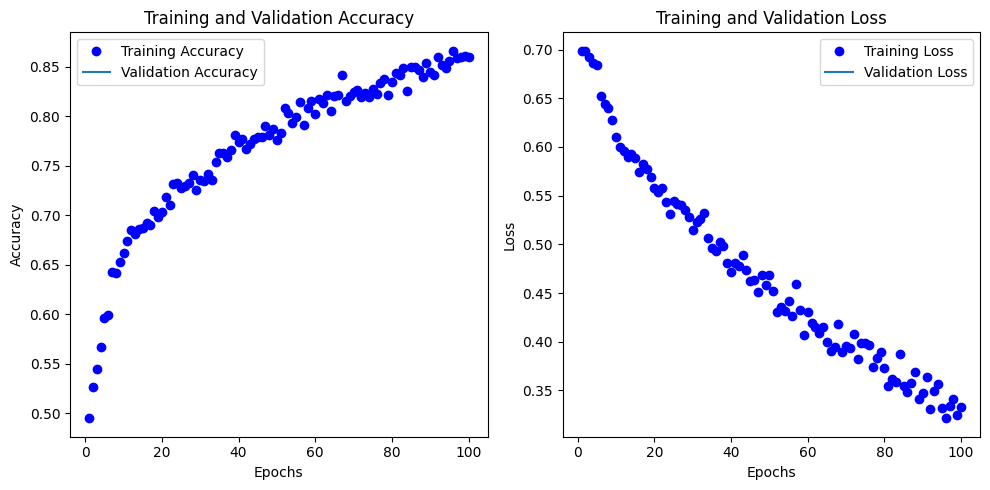

In [28]:
# Training history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(acc) + 1), acc,'bo', label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(loss) + 1), loss, 'bo',label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [30]:
from keras.applications import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [32]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'D:\\GitHub\\PTHT_TM\\base_dir'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 1998)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 1998 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step


In [33]:
train_features = np.reshape(train_features, (1998, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))


In [34]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(
    optimizer=optimizers.RMSprop(lr=2e-5), loss="binary_crossentropy", metrics=["acc"]
)
history = model.fit(
    train_features,
    train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels),
)


Epoch 1/30
100/100 [==============================] - 2s 18ms/step - loss: 0.6031 - acc: 0.7653 - val_loss: 0.3266 - val_acc: 0.8620
Epoch 2/30
100/100 [==============================] - 2s 16ms/step - loss: 0.3349 - acc: 0.8549 - val_loss: 0.2717 - val_acc: 0.8980
Epoch 3/30
100/100 [==============================] - 2s 16ms/step - loss: 0.2724 - acc: 0.8839 - val_loss: 0.2842 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 2s 16ms/step - loss: 0.2369 - acc: 0.9019 - val_loss: 0.2547 - val_acc: 0.8940
Epoch 5/30
100/100 [==============================] - 2s 16ms/step - loss: 0.2074 - acc: 0.9184 - val_loss: 0.2445 - val_acc: 0.9080
Epoch 6/30
100/100 [==============================] - 2s 17ms/step - loss: 0.1726 - acc: 0.9299 - val_loss: 0.3439 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 2s 16ms/step - loss: 0.1536 - acc: 0.9344 - val_loss: 0.3190 - val_acc: 0.8850
Epoch 8/30
100/100 [==============================] - 2s 16ms/step - 

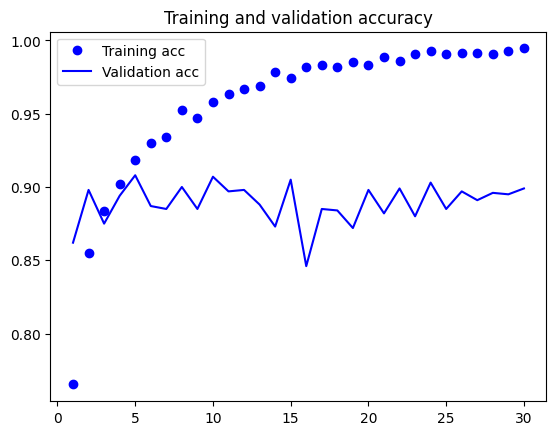

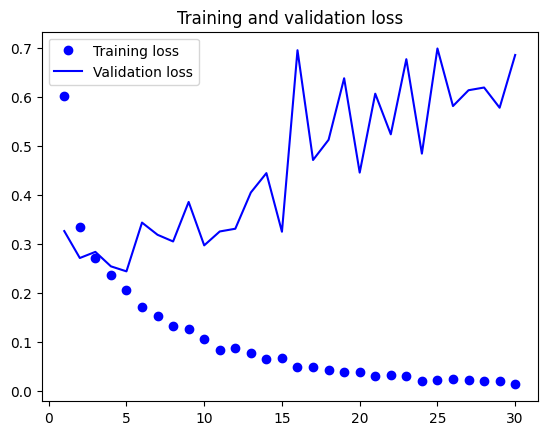

In [35]:
import matplotlib.pyplot
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"] as plt

val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [36]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()



Model: "sequential_5"


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
import os, shutil

original_dataset_dir = 'D:\\GitHub\\PTHT_TM\\training_set\\training_set'

base_dir = 'D:\\GitHub\\PTHT_TM\\base_dir'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')




In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
)
model.compile(
    loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=2e-5), metrics=["acc"]
)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
)

conv_base.summary()

Model: "vgg16"


Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13596\1427870153.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 37s 357ms/step - loss: 0.7435 - acc: 0.5045 - val_loss: 0.6928 - val_acc: 0.5280
Epoch 2/30
100/100 [==============================] - 42s 421ms/step - loss: 0.6950 - acc: 0.5095 - val_loss: 0.6897 - val_acc: 0.5640
Epoch 3/30
100/100 [==============================] - 43s 430ms/step - loss: 0.6931 - acc: 0.5280 - val_loss: 0.6829 - val_acc: 0.5180
Epoch 4/30
100/100 [==============================] - 50s 494ms/step - loss: 0.6792 - acc: 0.5746 - val_loss: 0.6608 - val_acc: 0.6050
Epoch 5/30
100/100 [==============================] - 48s 475ms/step - loss: 0.6652 - acc: 0.5986 - val_loss: 0.6331 - val_acc: 0.6400
Epoch 6/30
100/100 [==============================] - 44s 439ms/step - loss: 0.6428 - acc: 0.6226 - val_loss: 0.6300 - val_acc: 0.6370
Epoch 7/30
100/100 [==============================] - 42s 423ms/step - loss: 0.6347 - acc: 0.6451 - val_loss: 0.5918 - val_acc: 0.6830
Epoch 8/30
100/100 [==============================] - 4

NameError: name 'conv_base' is not defined

In [10]:
from tensorflow.keras.applications import VGG16

# Create a VGG16 model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Display the summary of the model
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False



In [12]:
model.compile(
    loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-5), metrics=["acc"]
)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13596\3247561314.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 58s 575ms/step - loss: 0.4973 - acc: 0.7658 - val_loss: 0.4794 - val_acc: 0.7760
Epoch 2/100
100/100 [==============================] - 42s 417ms/step - loss: 0.4603 - acc: 0.7883 - val_loss: 0.4806 - val_acc: 0.7760
Epoch 3/100
100/100 [==============================] - 46s 457ms/step - loss: 0.4698 - acc: 0.7893 - val_loss: 0.4390 - val_acc: 0.7940
Epoch 4/100
100/100 [==============================] - 45s 444ms/step - loss: 0.4705 - acc: 0.7778 - val_loss: 0.4191 - val_acc: 0.8030
Epoch 5/100
100/100 [==============================] - 45s 444ms/step - loss: 0.4689 - acc: 0.7828 - val_loss: 0.4626 - val_acc: 0.7800
Epoch 6/100
100/100 [==============================] - 44s 438ms/step - loss: 0.4526 - acc: 0.7933 - val_loss: 0.4259 - val_acc: 0.7970
Epoch 7/100
100/100 [==============================] - 43s 431ms/step - loss: 0.4534 - acc: 0.7888 - val_loss: 0.4899 - val_acc: 0.7490
Epoch 8/100
100/100 [===========================

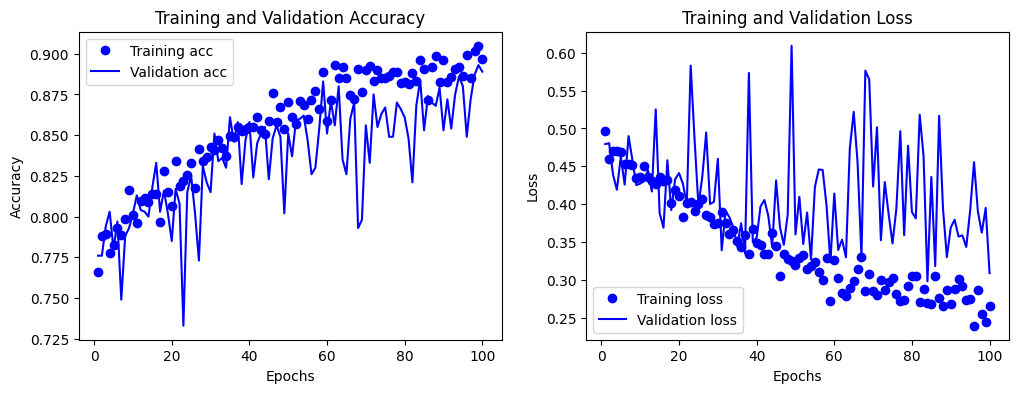

In [14]:
import matplotlib.pyplot as plt
# Plot training history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

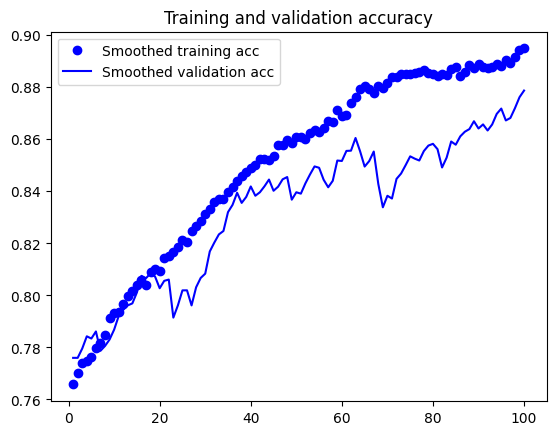

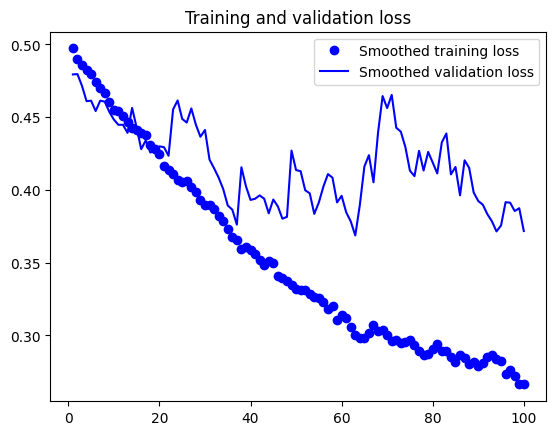

In [15]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [16]:
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=20, class_mode="binary"
)
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print("test acc:", test_acc)


Found 1000 images belonging to 2 classes.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13596\1726235878.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.8740000128746033


In [17]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_3"


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

In [18]:
img_path = 'D:\\GitHub\\PTHT_TM\\base_dir\\test\\cats\\cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255


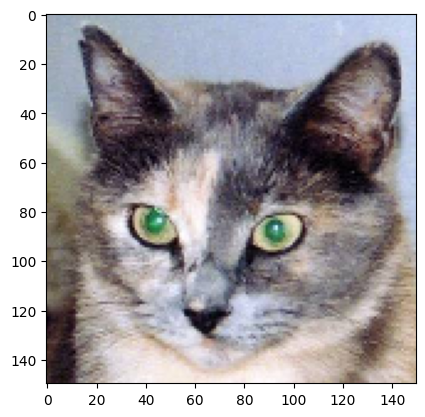

In [19]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()



In [20]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


In [21]:
activations = activation_model.predict(img_tensor)


1/1 [==============================] - 0s 125ms/step


In [22]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)


(1, 148, 148, 32)


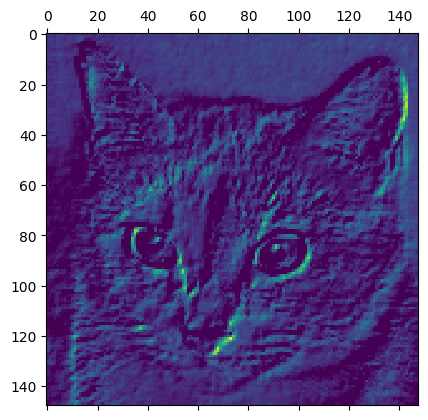

In [23]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


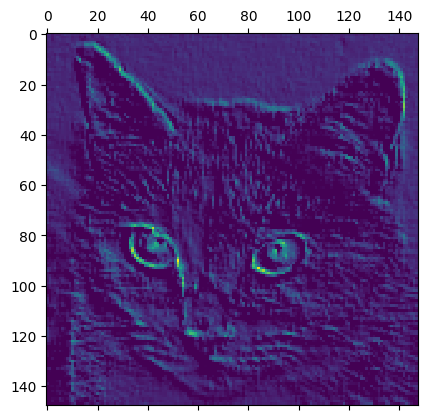

In [24]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13596\1473056433.py:15: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


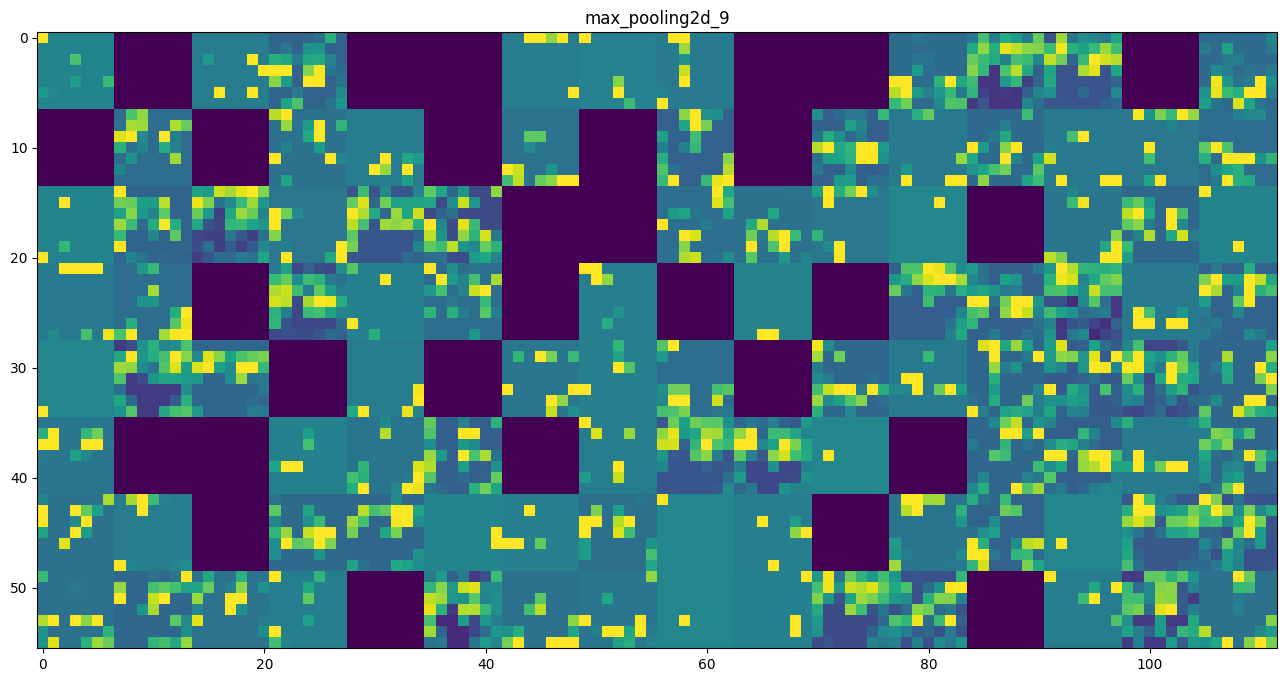

In [25]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image 
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [42]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

grads = K.gradients(loss, model.input)[0]



In [43]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [44]:
iterate = K.function([model.input], [loss, grads])


import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])


In [45]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step


In [46]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x


In [47]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)


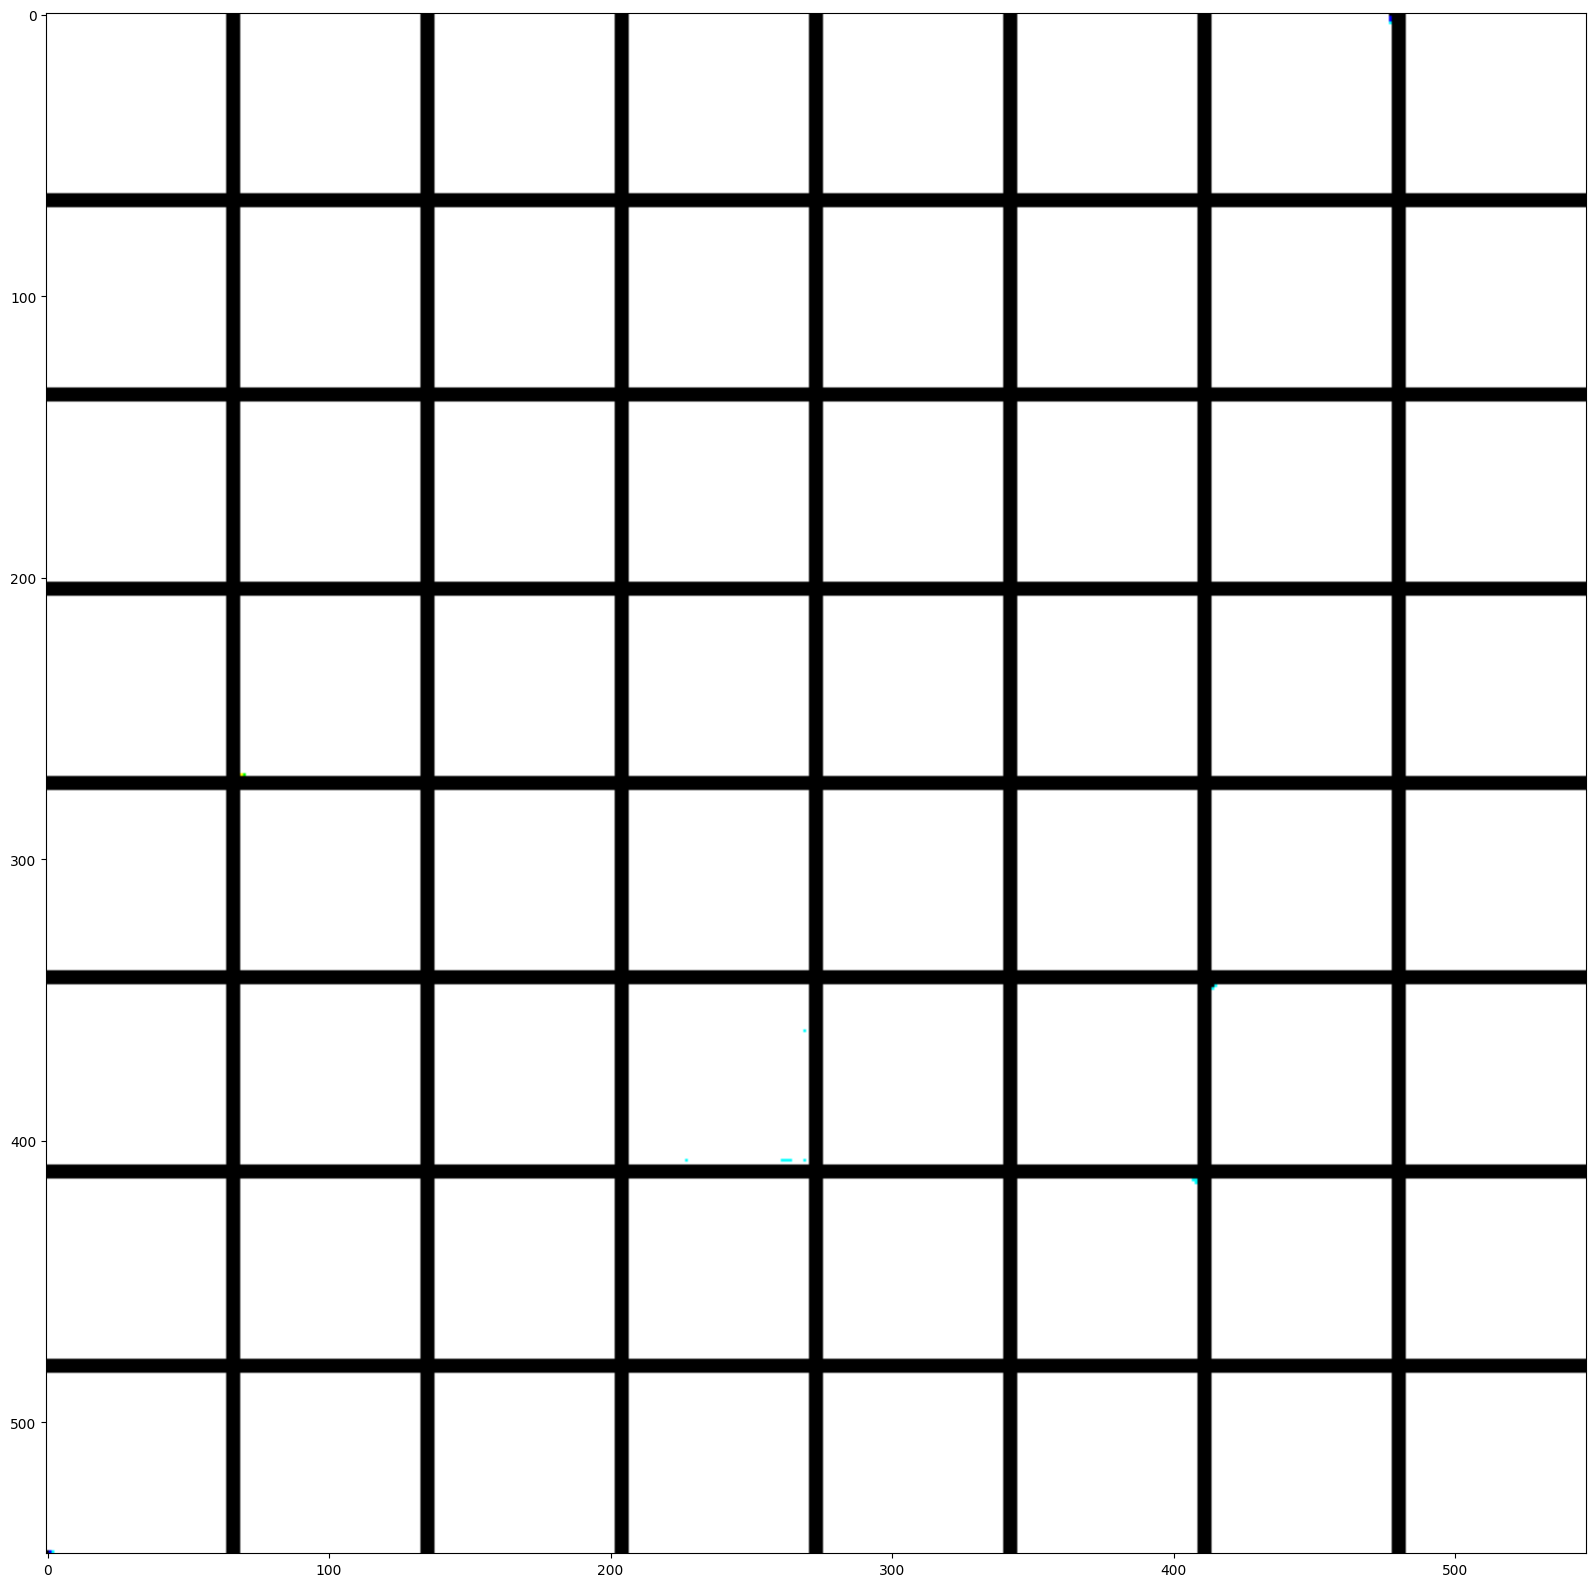

In [48]:
layer_name = 'block1_conv1'
size = 64
margin = 5

results = np.zeros((8 * size+7* margin, 8 * size+7* margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,
        vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results)


In [49]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')


553467096/553467096 [==============================] - 21s 0us/step


In [51]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
img_path = 'D:\\GitHub\\PTHT_TM\\training_set\\training_set\\cats\\cat.12.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])




C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


35363/35363 [==============================] - 0s 2us/step
Predicted: [('n02123045', 'tabby', 0.30871484), ('n02123159', 'tiger_cat', 0.15143433), ('n02124075', 'Egyptian_cat', 0.12951815)]


In [53]:
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)




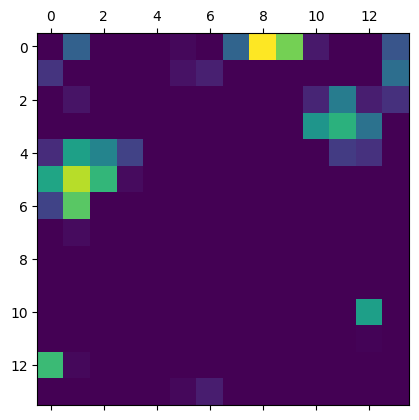

In [54]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)


In [58]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('D:\\GitHub\\PTHT_TM\\cat.jpg', superimposed_img)


True